## Coursera IBM Capstone Project

#### Week 4 
##### A description of the problem and a discussion of the background
##### A description of the data and how it will be used to solve the problem

### Introduction
#### Background
##### *Toronto* is Toronto is the capital city of the Canadian province of Ontario with population 2.7 Million. It is the most populous city in Canada and the fourth most populous city in North America.People have travelled through and inhabited the Toronto area, located on a broad sloping plateau interspersed with rivers, deep ravines, and urban forest, for more than 10,000 years. Now, Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world. Some neighbourhoods are Old Toronto, Downtown Core (Central), East End, North End, West End, East York, Etobicoke, North York, Scarborough, York.

##### *NYC* is New York City is often called just New York is the most populous city in the United States. It's population is 8.3 Million. Just like toronoto it is filled with people of different nationalities and it is a multicultural city. The five boroughs—Brooklyn, Queens, Manhattan, the Bronx, and Staten Island—were consolidated into a single city in 1898. Some neighbourhoods are Central Bronx, Central Brooklyn, Borough Park, Flatbush, Greenpoint, East Harlem, Upper West Side, Jamaica, Rockaways, West Queens.

#### Problem Statement
##### Toronto and NYC are top cities for tourism in the world. The tourism characteristics should be compared in this project. This study or project should be able to use restruant, museums, gallaries for comparision.  
##### Thus this project should be able to help business people who are trying to select a good neighbourhood for open restuarants. 

#### Scope of Study
##### In case of Toronto, the entire city area is taken for study. For NYC, some neighbourhoods in the study are Central Bronx, Central Brooklyn, Borough Park, Flatbush, Greenpoint, East Harlem, Upper West Side, Jamaica, Rockaways, West Queens. 

#### Data
##### The number of restaurants, museums, galleries in Toronto and NYC are compared. The data sources that explain the postal codes and corresponding neighborhoods/ boroughs/ districts of the two locations of interest are extracted from 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' (Toronto, Ontario). The postal codes for neighbourhoods in NYC are obtained via 'https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm' 
##### The coordinates of the postal codes based on the district/ borough/ neoghbourhood of both locations are extracted via 'http://cocl.us/Geospatial_data' (Toronto, Ontario).
##### The geospatial data, numbers and other detials of the restaurants, museums and galleries of both location of interest are extracted via Foursquare API.
##### example of data that we get from Foursquare API is the venues, venues latitude and venues longitude when the name of neighbourhood, its latitude and longitude is given
##### Example: (North York, 43.72588, -79.315572) will give result (The Curry & Roti Restaurant, 43.742554, -79.308792)
##### Exapmple: (North York, 43.718518, -79.464763) will give the result (Hakka No.1 Restaurant, 43.756800, -79.312850)



In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [30]:
!pip install lxml
!pip install lxml html5lib beautifulsoup4
!pip install geocoder
!pip install folium
!pip install geopy
from geopy.geocoders import Nominatim 

In [4]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))

In [12]:
PostData = df[0] 

PostData=PostData[PostData.Borough != 'Not assigned'].reset_index() #Cleaning the not assigned borough names
PostData = PostData.drop(['index'], axis=1)
PostData.head()

Postal Code           Borough                                Neighbourhood
0         M3A        North York                                    Parkwoods
1         M4A        North York                             Victoria Village
2         M5A  Downtown Toronto                    Regent Park, Harbourfront
3         M6A        North York             Lawrence Manor, Lawrence Heights
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

In [13]:
print(PostData.shape)

(103, 3)


In [14]:
url = 'https://cocl.us/Geospatial_data'
Geo = pd.read_csv(url,sep=',')
Lats=[]
Longs=[]
for i, row in PostData.iterrows():
    for j, row in Geo.iterrows():
        if PostData.loc[i,"Postal Code"]==Geo.loc[j,"Postal Code"]:
            Lats.append(Geo.loc[j,"Latitude"])
            Longs.append(Geo.loc[j,"Longitude"])
PostData['Lat'] = Lats
PostData['Long'] = Longs
PostData.head()

Postal Code           Borough                                Neighbourhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

         Lat       Long  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

In [25]:
import json # Handling JSON files
import requests # Library to handle requests
from pandas.io.json import json_normalize # Transform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium as fl # Map Rendering as

In [26]:
# Inputing Toronto's coordinates
lat=43.651070
long = -79.347015
#Creating city map
map_toronto = fl.Map(location=[lat,long],zoom_start = 10)
for index, rows in PostData.iterrows():
    lat = PostData.loc[index,"Lat"]
    long = PostData.loc[index,"Long"]
    Neigh = PostData.loc[index,"Neighbourhood"]
    Borough = PostData.loc[index,"Borough"]
    label = '{},{}'.format(Neigh,Borough)
    label = fl.Popup(label,parse_html=True)
    fl.CircleMarker(
    [lat,long],
    radius=10,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
#Well, here we iterate from all the neibhbourhoods in data and add then to our map.
map_toronto


In [28]:
nyc = [[['Central Bronx'],[10453]],[['Central Brooklyn'],[11212]],[['Borough Park'],[11204]],[['Flatbush'],[11203]], \
                              [['Greenpoint'],[11211]],[['East Harlem'],[10029]], \
                              [['Upper West Side'],[10023]],[['Jamaica'],[11412]],[['Rockaways'],[11691]],[['West Queens'],[11368]]]

district_list =[]
postal_code_list=[]

for dist in nyc:
    for dist_name in dist[0]:
        for post_code in dist[1]:
            district_list.append(dist_name)
            postal_code_list.append(post_code)
     
    nyc_df=pd.DataFrame({'District':district_list,'Postal Code':postal_code_list}) #To create Dataframe with districts and postal code information

nyc_df #Displaying the resulted dataframe

District  Postal Code
0     Central Bronx        10453
1  Central Brooklyn        11212
2      Borough Park        11204
3          Flatbush        11203
4        Greenpoint        11211
5       East Harlem        10029
6   Upper West Side        10023
7           Jamaica        11412
8         Rockaways        11691
9       West Queens        11368

In [31]:
geolocator = Nominatim(user_agent="foursquare_agent")

lat_list =[] #To create a list to store latitude values
lng_list=[] #To create a list to store longitude values

#To obtain geospatial data for the corresponding districts and postal codes
for pc, d in zip(nyc_df['Postal Code'],nyc_df['District']):
   
    location = geolocator.geocode('{},{}'.format(pc,d))
    latitude = location.latitude
    longitude = location.longitude
    lat_list.append(latitude)
    lng_list.append(longitude)

nyc_df['Latitude']=lat_list
nyc_df['Longitude']=lng_list

nyc_df # To display dataframe with geospatial data

District  Postal Code   Latitude  Longitude
0     Central Bronx        10453  40.850656 -73.866524
1  Central Brooklyn        11212  40.650104 -73.949582
2      Borough Park        11204  40.633993 -73.996806
3          Flatbush        11203  40.652048 -73.959027
4        Greenpoint        11211  40.723713 -73.950971
5       East Harlem        10029  40.794722 -73.942500
6   Upper West Side        10023  40.787045 -73.975416
7           Jamaica        11412  40.691485 -73.805677
8         Rockaways        11691 -33.908704  18.398713
9       West Queens        11368  40.749824 -73.797634

In [34]:
map_nyc = folium.Map(location=[40.7896239, -73.9598939], zoom_start=13)

# add markers to map
for lat, lng, district, postalcode in zip(nyc_df['Latitude'], nyc_df['Longitude'], nyc_df['District'], nyc_df['Postal Code']):
    label = '{}, {}'.format(postalcode, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  
    
map_nyc

In [35]:
CLIENT_ID = 'ZZ15HRJJZMST2QNGKC4OM2FXSICLGMRCJYPS21NWC5Q4R04F' # your Foursquare ID
CLIENT_SECRET = 'ZKPBWAX12PWFB1SH2THCWKXU43YUNJ3HRBIJVQ2LKRMWOKH5' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZZ15HRJJZMST2QNGKC4OM2FXSICLGMRCJYPS21NWC5Q4R04F
CLIENT_SECRET:ZKPBWAX12PWFB1SH2THCWKXU43YUNJ3HRBIJVQ2LKRMWOKH5


In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius, search):
    
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
         # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search, radius, LIMIT)
            
        # make the GET request
        results_1 = requests.get(url).json()["response"]['venues']
   
        for r,n,la,lo in zip(results_1,names,latitudes,longitudes):
        
              venues_list.append([(n,la,lo,r['name'],r['location']['lat'],r['location']['lng'])])
            
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

In [42]:
df_toronto_res = getNearbyVenues(names=PostData['Borough'], latitudes=PostData['Lat'], longitudes=PostData['Long'],radius=2000, search='Restaurant')
#Call function for restaurants geospatial data

North York
North York
Downtown Toronto
North York
Downtown Toronto
Etobicoke
Scarborough
North York
East York
Downtown Toronto
North York
Etobicoke
Scarborough
North York
East York
Downtown Toronto
York
Etobicoke
Scarborough
East Toronto
Downtown Toronto
York
Scarborough
East York
Downtown Toronto
Downtown Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
North York
North York
Scarborough
North York
North York
East Toronto
North York
York
North York
Scarborough
North York
North York
Central Toronto
Central Toronto
York
York
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Etobicoke
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Mississauga
Etobicoke
Scarborough
Central Toronto
Downtown Toronto
West Toron

In [43]:
#To remove duplicates
df_toronto_res.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered restaurants throughout Toronto, Ontario.'.format(len(df_toronto_res['Venue'].unique())))
df_toronto_res.head()

There are a total of 981 registered restaurants throughout Toronto, Ontario.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1        North York              43.725882              -79.315572   
3        North York              43.718518              -79.464763   
4  Downtown Toronto              43.662301              -79.389494   
5         Etobicoke              43.667856              -79.532242   
6       Scarborough              43.806686              -79.194353   

                             Venue  Venue Latitude  Venue Longitude  
1      The Curry & Roti Restaurant       43.742554       -79.308792  
3            Hakka No.1 Restaurant       43.756800       -79.312850  
4  Valley Fields Family Restaurant       43.741452       -79.319633  
5              The Mill Restaurant       43.740700       -79.322400  
6                Karibu Restaurant       43.759216       -79.311051

In [45]:
map_toronto_res = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_toronto_res['Venue Latitude'], df_toronto_res['Venue Longitude'], df_toronto_res['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_res)  
    
map_toronto_res #Display map
# The geospatial data of restaurants is visualized as below:

In [47]:
df_toronto_gal = getNearbyVenues(names=PostData['Borough'], latitudes=PostData['Lat'], longitudes=PostData['Long'],radius=2000, search='Gallery')

North York
North York
Downtown Toronto
North York
Downtown Toronto
Etobicoke
Scarborough
North York
East York
Downtown Toronto
North York
Etobicoke
Scarborough
North York
East York
Downtown Toronto
York
Etobicoke
Scarborough
East Toronto
Downtown Toronto
York
Scarborough
East York
Downtown Toronto
Downtown Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
North York
North York
Scarborough
North York
North York
East Toronto
North York
York
North York
Scarborough
North York
North York
Central Toronto
Central Toronto
York
York
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Etobicoke
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Mississauga
Etobicoke
Scarborough
Central Toronto
Downtown Toronto
West Toron

In [48]:
#To remove duplicates
df_toronto_gal.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered galleries throughout Toronto, Ontario.'.format(len(df_toronto_gal['Venue'].unique())))
df_toronto_gal.head()

There are a total of 401 registered galleries throughout Toronto, Ontario.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        North York              43.753259              -79.329656   
2        North York              43.725882              -79.315572   
3  Downtown Toronto              43.654260              -79.360636   
4        North York              43.718518              -79.464763   
5  Downtown Toronto              43.662301              -79.389494   

                    Venue  Venue Latitude  Venue Longitude  
0  Sandra Ainsley Gallery       43.719044       -79.308892  
2           Rouge gallery       43.659070       -79.349182  
3           Bottē Gallery       43.654110       -79.360976  
4       Jane Roos Gallery       43.653962       -79.361090  
5          Austin Gallery       43.648814       -79.378071

In [49]:
map_toronto_gal = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_toronto_gal['Venue Latitude'], df_toronto_gal['Venue Longitude'], df_toronto_gal['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_gal)  
    
map_toronto_gal
# The geospatial data of galleries is visualized as below:

In [50]:
df_toronto_meu = getNearbyVenues(names=PostData['Borough'], latitudes=PostData['Lat'], longitudes=PostData['Long'],radius=2000, search='Museum')

North York
North York
Downtown Toronto
North York
Downtown Toronto
Etobicoke
Scarborough
North York
East York
Downtown Toronto
North York
Etobicoke
Scarborough
North York
East York
Downtown Toronto
York
Etobicoke
Scarborough
East Toronto
Downtown Toronto
York
Scarborough
East York
Downtown Toronto
Downtown Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East York
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
West Toronto
Scarborough
North York
North York
East Toronto
Downtown Toronto
North York
North York
Scarborough
North York
North York
East Toronto
North York
York
North York
Scarborough
North York
North York
Central Toronto
Central Toronto
York
York
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Etobicoke
Scarborough
North York
Central Toronto
Central Toronto
West Toronto
Mississauga
Etobicoke
Scarborough
Central Toronto
Downtown Toronto
West Toron

In [51]:
#To remove duplicates
df_toronto_meu.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered museums throughout Toronto, Ontario.'.format(len(df_toronto_meu['Venue'].unique())))
df_toronto_meu.head()

There are a total of 36 registered museums throughout Toronto, Ontario.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
2        North York              43.753259              -79.329656   
3        North York              43.725882              -79.315572   
4  Downtown Toronto              43.654260              -79.360636   
5        North York              43.718518              -79.464763   
6  Downtown Toronto              43.662301              -79.389494   

                            Venue  Venue Latitude  Venue Longitude  
2             Museum Of Illusions       43.650219       -79.369451  
3  Museum Of The End Of The World       43.654061       -79.385452  
4           Riverdale Farm Museum       43.667602       -79.360132  
5  Cabbagetown Regent Park Museum       43.667732       -79.359980  
6            Friar’s Music Museum       43.655662       -79.380426

In [53]:
map_toronto_meu = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_toronto_meu['Venue Latitude'], df_toronto_meu['Venue Longitude'], df_toronto_meu['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_meu)  
    
map_toronto_meu
# The geospatial data of museums is visualized as below:

In [54]:
df_NYC = getNearbyVenues(names=nyc_df['District'], latitudes=nyc_df['Latitude'], longitudes=nyc_df['Longitude'],radius=2500, search='Restaurant') #Call function for restaurants geospatial data

Central Bronx
Central Brooklyn
Borough Park
Flatbush
Greenpoint
East Harlem
Upper West Side
Jamaica
Rockaways
West Queens


In [55]:
#To remove duplicates
df_NYC.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered restaurants throughout NYC.'.format(len(df_NYC['Venue'].unique())))
df_NYC.head()

There are a total of 93 registered restaurants throughout NYC.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0     Central Bronx              40.850656              -73.866524   
1  Central Brooklyn              40.650104              -73.949582   
2      Borough Park              40.633993              -73.996806   
3          Flatbush              40.652048              -73.959027   
4        Greenpoint              40.723713              -73.950971   

                             Venue  Venue Latitude  Venue Longitude  
0              900 Park Restaurant       40.846690       -73.859460  
1       Mr. Q's Chinese Restaurant       40.855790       -73.855455  
2         No. 8 Chinese Restaurant       40.858553       -73.868267  
3  Primavera Pizzeria & Restaurant       40.845761       -73.863848  
4                Steven Restaurant       40.858553       -73.868267

In [60]:
map_NYC = folium.Map(location=[40.7896239, -73.9598939], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_NYC['Venue Latitude'], df_NYC['Venue Longitude'], df_NYC['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NYC)  
    
map_NYC #Display map
#The geospatial data of restaurants is visualized as below:

In [61]:
df_NYC_gal = getNearbyVenues(names=nyc_df['District'], latitudes=nyc_df['Latitude'], longitudes=nyc_df['Longitude'],radius=2500, search='Gallery') #Call function for galleries geospatial data

Central Bronx
Central Brooklyn
Borough Park
Flatbush
Greenpoint
East Harlem
Upper West Side
Jamaica
Rockaways
West Queens


In [62]:
#To remove duplicates
df_NYC_gal.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered galleries throughout NYC.'.format(len(df_NYC_gal['Venue'].unique())))
df_NYC_gal.head()

There are a total of 76 registered galleries throughout NYC.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0     Central Bronx              40.850656              -73.866524   
1  Central Brooklyn              40.650104              -73.949582   
2      Borough Park              40.633993              -73.996806   
3          Flatbush              40.652048              -73.959027   
4        Greenpoint              40.723713              -73.950971   

                                    Venue  Venue Latitude  Venue Longitude  
0                 Angela's Floral Gallery       40.865683       -73.858263  
1  The Passage Gallery @ Purchase College       40.851733       -73.864997  
2       Britton Science Rotunda & Gallery       40.866673       -73.878893  
3                             The Gallery       40.856336       -73.866957  
4                         The Gallery 172       40.831580       -73.874919

In [65]:
map_NYC_gal = folium.Map(location=[40.7896239, -73.9598939], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_NYC_gal['Venue Latitude'], df_NYC_gal['Venue Longitude'], df_NYC_gal['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NYC_gal)  
    
map_NYC_gal #Display map
#The geospatial data of galleries is visualized as below:


In [67]:
df_NYC_meu = getNearbyVenues(names= nyc_df['District'], latitudes=nyc_df['Latitude'], longitudes=nyc_df['Longitude'],radius=2500, search='Museum') #Call function for museums geospatial data


Central Bronx
Central Brooklyn
Borough Park
Flatbush
Greenpoint
East Harlem
Upper West Side
Jamaica
Rockaways
West Queens


In [68]:
#To remove duplicates
df_NYC_meu.drop_duplicates(keep=False,inplace=True)

print('There are a total of {} registered museums throughout NYC.'.format(len(df_NYC_meu['Venue'].unique())))
df_NYC_meu.head()

There are a total of 54 registered museums throughout NYC.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0     Central Bronx              40.850656              -73.866524   
1  Central Brooklyn              40.650104              -73.949582   
2      Borough Park              40.633993              -73.996806   
3          Flatbush              40.652048              -73.959027   
6      Borough Park              40.633993              -73.996806   

                                              Venue  Venue Latitude  \
0                           Museum Of Bronx History       40.877374   
1  Fordham Museum of Greek, Etruscan, and Roman Art       40.861504   
2                           Edgar Allan Poe Cottage       40.865573   
3                            Valentine Varian House       40.877391   
6                          Wyckoff Farmhouse Museum       40.644544   

   Venue Longitude  
0       -73.879441  
1       -73.889140  
2       -73.894421  
3       -73.879323  
6       -73.920818

In [70]:
map_NYC_meu = folium.Map(location=[40.7896239, -73.9598939], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_NYC_meu['Venue Latitude'], df_NYC_meu['Venue Longitude'], df_NYC_meu['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NYC_meu)  
    
map_NYC_meu #Display map



#### Methodology
##### In this section the data comprises of the number of restaurants, galleries and museums in Toronto and NYC are collected using the search query function avialable in Foursquare API, with the respective baseline input search queries of 'Restaurant', 'Gallery' and 'Museum' and radius settings of 2000m for Toronto and 2500m for NYC. The radius settings are selected based on the distribution of districts or borough in both location of interests. 

##### In this following section, the data gathered from the previous section will be used to do exploratory data analysis, we will be looking into the data comparisons of both locations via data visualisation as explained below:

##### Total Number of Restaurants, Museums and Galleries in both location.
##### Distribution of Restaurants, Museums and Galleries in both location according to districts / boroughs.
##### Total Number of Restaurants, Museums and Galleries per district / borough in both location. Then, the potentiality study of both locations on tourism will be accessed based on the analyzed data

#### Analysis
##### Study on the total number of Restaurants, Galleries and Museums in both Location. Here, the study on the total number of restaurants, galleries and museums are aggregated in the form of dataframes for comprehension.

In [71]:
# To construct a dataframe to compare total number of restaurants, galleries and museums for both locations
df_total_compiled = pd.DataFrame(np.array([['Restaurants',len(df_toronto_res['Venue'].unique()),len(df_NYC['Venue'].unique())],
                                           ['Galleries',len(df_toronto_gal['Venue'].unique()),len(df_NYC_gal['Venue'].unique())],
                                           ['Museums',len(df_toronto_meu['Venue'].unique()),len(df_NYC_meu['Venue'].unique())],
                                           ['Total',len(df_toronto_meu['Venue'].unique())+len(df_toronto_res['Venue'].unique())+len(df_toronto_gal['Venue'].unique()),len(df_NYC_meu['Venue'].unique())+len(df_NYC_gal['Venue'].unique())+len(df_NYC['Venue'].unique())]]
                                         ),
                                           columns=['Buildings','Toronto','NYC'])

df_total_compiled_2 = df_total_compiled.set_index('Buildings')
df_total_compiled_f = df_total_compiled_2[['Toronto','NYC']].astype('int64') 

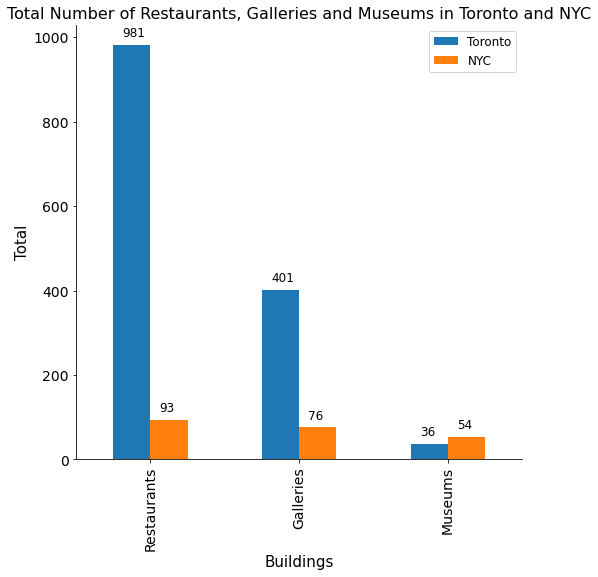

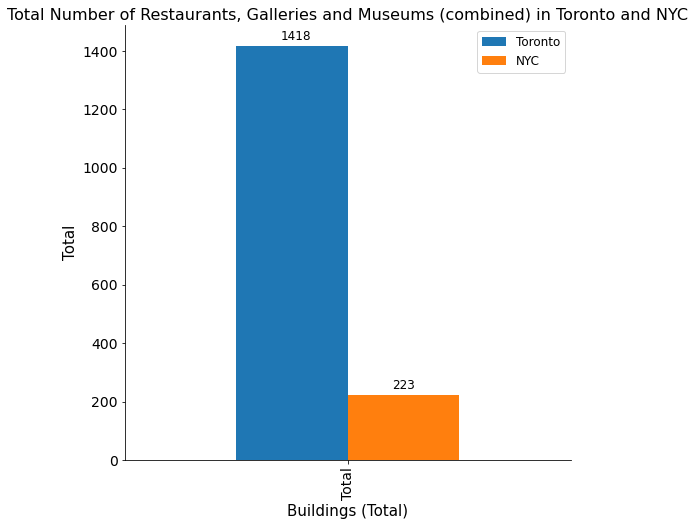

In [73]:
#Set bar chart

ax = df_total_compiled_f.loc[['Restaurants','Galleries','Museums']].plot(kind = 'bar',figsize=(8, 8),fontsize = 14)
ax_total = df_total_compiled_f.loc[['Total']].plot(kind = 'bar',figsize=(8, 8),fontsize = 14)

#Set bar chart title
ax.set_title('Total Number of Restaurants, Galleries and Museums in Toronto and NYC',fontsize= 16)
ax_total.set_title('Total Number of Restaurants, Galleries and Museums (combined) in Toronto and NYC',fontsize = 16)

# add labels to axes
ax.set_xlabel('Buildings', fontsize=15 )
ax.set_ylabel('Total', fontsize=15)

ax_total.set_xlabel('Buildings (Total)', fontsize=15)
ax_total.set_ylabel('Total', fontsize=15)

#add legends
ax.legend(fontsize=12)
ax_total.legend(fontsize=12)

#Removing borders of left, right and top
borders = ["top","right"]

for b in borders:
    ax.spines[b].set_visible(False)
    ax_total.spines[b].set_visible(False)

    
# set individual bar labels in the bar chart
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.06, i.get_height()+20, \
            str(round(i.get_height())), fontsize=12,
                color='black')
for i in ax_total.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_total.text(i.get_x()+0.10, i.get_height()+20, \
            str(round(i.get_height())), fontsize=12,
                color='black')